# Map creation from results

In [ ]:
#Needed libraries
#! pip3 install contextily
#! pip3 install geopandas

In [1]:
#We impport the needed libraries
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd

We load our predictions file, which contains the original values and the predictions for the validation dataset. The prediction columns are identified with `_p` at the end.

In [2]:
puntos_file = "./data/prediccion_final_alpha.csv"
puntos = pd.read_csv(puntos_file)
puntos.head()

,Latitude,Longitude,x,y,z,Elevation,BIO1,BIO2,BIO3,BIO4,...,BIO12_p,BIO13_p,BIO14_p,BIO15_p,BIO16_p,BIO17_p,BIO18_p,BIO19_p,Longitude_p,Latitude_p
0,41.015340,-72.528080,-3988.143700,4585.354503,-1912.818577,15.0,10.775000,21.333334,0.30,1167.0,...,9.418606,28.815302,861.5878,27.594439,-5.163330,32.746070,2.992606,18.642715,-72.583990,40.893646
1,64.490000,-157.750000,-2177.188676,1038.932208,5896.618551,39.0,-2.870833,14.016666,-19.00,344.0,...,9.067899,20.046906,1366.7466,20.540280,-24.575897,45.119280,11.845457,-3.340799,-157.404280,63.929320
2,41.841118,-88.230357,-4247.858745,4744.115183,-196.744039,224.0,9.354167,21.733334,-4.15,943.0,...,11.445438,28.559982,1041.2792,29.037140,-11.018497,40.054527,21.658121,-3.931832,-88.422165,41.767914
3,64.490000,-157.750000,-2177.188676,1038.932208,5896.618551,39.0,-2.870833,14.016666,-19.00,344.0,...,9.052017,20.324050,1366.9756,20.516754,-24.544682,45.051537,11.768763,-3.382959,-157.519130,63.396515
4,41.840733,-88.230357,-4247.826866,4744.143726,-196.744039,224.0,9.354167,21.733334,-4.15,943.0,...,11.403337,28.722992,1052.6826,28.958277,-11.064608,40.021645,21.510078,-4.167573,-88.249920,42.317720


In [3]:
puntos[puntos.Longitude.between(-50,0)]

,Latitude,Longitude,x,y,z,Elevation,BIO1,BIO2,BIO3,BIO4,...,BIO12_p,BIO13_p,BIO14_p,BIO15_p,BIO16_p,BIO17_p,BIO18_p,BIO19_p,Longitude_p,Latitude_p
72,40.068228,-2.900725,-207.533910,246.732003,-6362.836945,862.0,13.291667,22.650000,5.400000,457.0,...,13.350090,39.622864,723.40980,33.833004,0.319881,33.557117,10.554506,24.028028,-4.765106,29.799774
111,37.633900,-2.039614,-138.454751,179.567279,-6366.963709,808.0,14.175000,23.283333,6.400000,368.0,...,12.309455,39.253070,645.81290,32.947678,2.345057,30.595388,13.084083,24.326004,-0.039566,31.687141
116,37.721332,-1.836988,-124.951558,161.544085,-6367.725781,493.0,15.683333,24.166666,8.316667,318.0,...,12.710650,39.335434,695.17255,32.940370,0.675714,32.195084,11.791164,22.949700,-3.619202,57.821990


To create a map, we need to transform our DataFrame to a GeoDataFrame, the main difference is that a GeoDataFrame has a _geometry_ column. To be sure that we are plotting correctly we  will use the _European Petroleum Survey Group_ 4326, which is the standard

We create two dataframes, one that contains the geometry for the predictions and another for the real values.

In [4]:
pred_gdf = gpd.GeoDataFrame(puntos.copy(), geometry=gpd.points_from_xy(puntos['Longitude_p'], puntos['Latitude_p']), crs='EPSG:4326')
pred_gdf

,Latitude,Longitude,x,y,z,Elevation,BIO1,BIO2,BIO3,BIO4,...,BIO13_p,BIO14_p,BIO15_p,BIO16_p,BIO17_p,BIO18_p,BIO19_p,Longitude_p,Latitude_p,geometry
0,41.015340,-72.528080,-3988.143700,4585.354503,-1912.818577,15.0,10.775000,21.333334,0.300000,1167.0,...,28.815302,861.58780,27.594439,-5.163330,32.746070,2.992606,18.642715,-72.583990,40.893646,POINT (-72.58399 40.89365)
1,64.490000,-157.750000,-2177.188676,1038.932208,5896.618551,39.0,-2.870833,14.016666,-19.000000,344.0,...,20.046906,1366.74660,20.540280,-24.575897,45.119280,11.845457,-3.340799,-157.404280,63.929320,POINT (-157.40428 63.92932)
2,41.841118,-88.230357,-4247.858745,4744.115183,-196.744039,224.0,9.354167,21.733334,-4.150000,943.0,...,28.559982,1041.27920,29.037140,-11.018497,40.054527,21.658121,-3.931832,-88.422165,41.767914,POINT (-88.42217 41.76791)
3,64.490000,-157.750000,-2177.188676,1038.932208,5896.618551,39.0,-2.870833,14.016666,-19.000000,344.0,...,20.324050,1366.97560,20.516754,-24.544682,45.051537,11.768763,-3.382959,-157.519130,63.396515,POINT (-157.51913 63.39652)
4,41.840733,-88.230357,-4247.826866,4744.143726,-196.744039,224.0,9.354167,21.733334,-4.150000,943.0,...,28.722992,1052.68260,28.958277,-11.064608,40.021645,21.510078,-4.167573,-88.249920,42.317720,POINT (-88.24992 42.31772)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,35.117000,138.937000,2407.433778,-3423.272279,4803.655952,55.0,15.845834,25.116667,6.700000,1823.0,...,30.588444,750.67255,30.572860,0.598516,29.972168,24.551981,6.899573,139.382280,35.257767,POINT (139.38228 35.25777)
157,20.086000,-155.829000,-895.898875,2450.013539,5812.438375,363.0,22.679167,24.483334,20.750000,1174.0,...,70.768450,161.34955,29.516068,15.425292,14.076544,22.133736,21.132008,-156.431060,20.981232,POINT (-156.43106 20.98123)
158,68.596883,-149.601250,-3001.493512,1176.460794,5495.144921,776.0,-9.508333,8.733334,-24.100000,239.0,...,23.265797,1376.31600,15.171436,-29.825130,45.021294,8.787936,-20.284636,-149.016160,67.927140,POINT (-149.01616 67.92714)
159,9.160930,-79.742700,-998.103557,6189.215785,-1134.477087,95.0,26.258333,27.250000,25.533333,2637.0,...,72.687160,87.06653,30.534145,21.962685,8.615108,26.493252,26.240108,-75.729225,9.523247,POINT (-75.72922 9.52325)


In [51]:
real_gdf = gpd.GeoDataFrame(puntos.copy(), geometry=gpd.points_from_xy(puntos['Longitude'], puntos['Latitude']), crs='EPSG:4326') 
real_gdf

,Latitude,Longitude,x,y,z,Elevation,BIO1,BIO2,BIO3,BIO4,...,BIO13_p,BIO14_p,BIO15_p,BIO16_p,BIO17_p,BIO18_p,BIO19_p,Longitude_p,Latitude_p,geometry
0,41.015340,-72.528080,-3988.143700,4585.354503,-1912.818577,15.0,10.775000,21.333334,0.300000,1167.0,...,28.815302,861.58780,27.594439,-5.163330,32.746070,2.992606,18.642715,-72.583990,40.893646,POINT (-72.52808 41.01534)
1,64.490000,-157.750000,-2177.188676,1038.932208,5896.618551,39.0,-2.870833,14.016666,-19.000000,344.0,...,20.046906,1366.74660,20.540280,-24.575897,45.119280,11.845457,-3.340799,-157.404280,63.929320,POINT (-157.75000 64.49000)
2,41.841118,-88.230357,-4247.858745,4744.115183,-196.744039,224.0,9.354167,21.733334,-4.150000,943.0,...,28.559982,1041.27920,29.037140,-11.018497,40.054527,21.658121,-3.931832,-88.422165,41.767914,POINT (-88.23036 41.84112)
3,64.490000,-157.750000,-2177.188676,1038.932208,5896.618551,39.0,-2.870833,14.016666,-19.000000,344.0,...,20.324050,1366.97560,20.516754,-24.544682,45.051537,11.768763,-3.382959,-157.519130,63.396515,POINT (-157.75000 64.49000)
4,41.840733,-88.230357,-4247.826866,4744.143726,-196.744039,224.0,9.354167,21.733334,-4.150000,943.0,...,28.722992,1052.68260,28.958277,-11.064608,40.021645,21.510078,-4.167573,-88.249920,42.317720,POINT (-88.23036 41.84073)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,35.117000,138.937000,2407.433778,-3423.272279,4803.655952,55.0,15.845834,25.116667,6.700000,1823.0,...,30.588444,750.67255,30.572860,0.598516,29.972168,24.551981,6.899573,139.382280,35.257767,POINT (138.93700 35.11700)
157,20.086000,-155.829000,-895.898875,2450.013539,5812.438375,363.0,22.679167,24.483334,20.750000,1174.0,...,70.768450,161.34955,29.516068,15.425292,14.076544,22.133736,21.132008,-156.431060,20.981232,POINT (-155.82900 20.08600)
158,68.596883,-149.601250,-3001.493512,1176.460794,5495.144921,776.0,-9.508333,8.733334,-24.100000,239.0,...,23.265797,1376.31600,15.171436,-29.825130,45.021294,8.787936,-20.284636,-149.016160,67.927140,POINT (-149.60125 68.59688)
159,9.160930,-79.742700,-998.103557,6189.215785,-1134.477087,95.0,26.258333,27.250000,25.533333,2637.0,...,72.687160,87.06653,30.534145,21.962685,8.615108,26.493252,26.240108,-75.729225,9.523247,POINT (-79.74270 9.16093)


We create a test plot to check the differences

<AxesSubplot: >

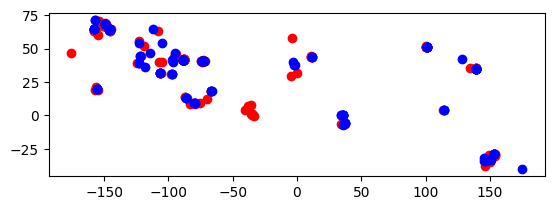

In [6]:
f, ax = plt.subplots()
pred_gdf.plot(c='r', ax=ax)
real_gdf.plot(c='b', ax=ax)

## Maps

### Comparison between the coordinates predicted and the real ones

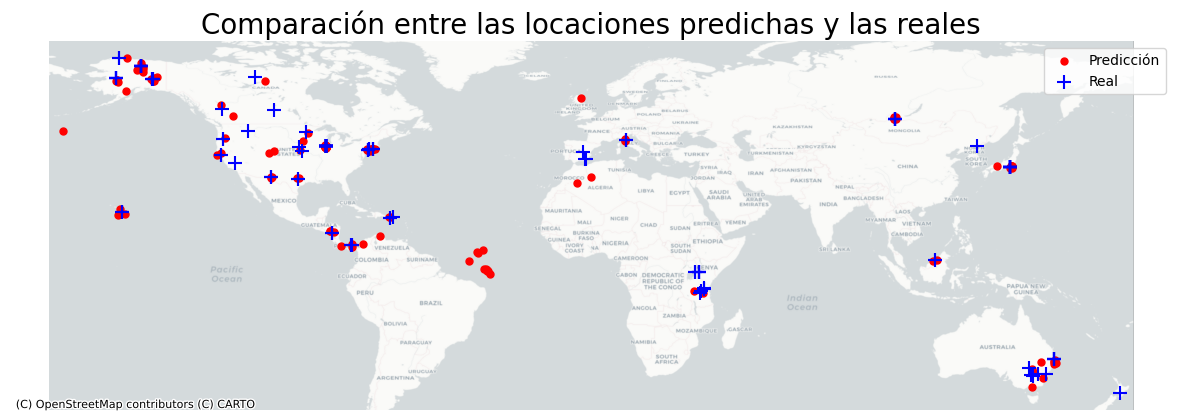

In [11]:
#We set the canva to plot
fig, ax = plt.subplots(1, figsize=(15, 15))

#We plot both geometries, the real ones and the predicted
pred_gdf.plot(marker='.', c='r', ax=ax, markersize=100, zorder=1, label="Predicción")
real_gdf.plot(marker='+', c='b', ax=ax, markersize=100, zorder=2, label="Real")

#Add tittle
plt.title("Comparación entre las locaciones predichas y las reales",fontsize=20)

#Quit the axis numbers
plt.axis("off")

#Add legend
plt.legend()

#Add background map
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')

#Save plot
#fig.savefig('coords.png', bbox_inches='tight', pad_inches=0)

### Comparison between the coordinates predicted and the real ones, adding information about the temperature (°C)

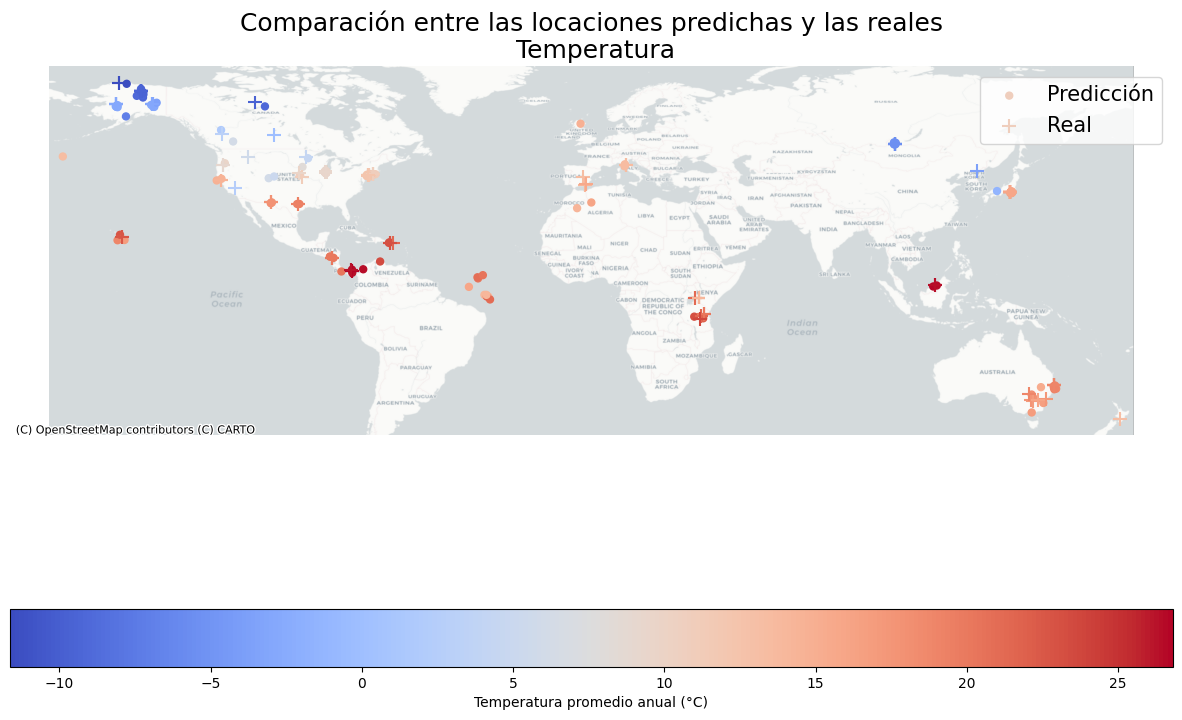

In [12]:
fig, ax = plt.subplots(1,1 ,figsize=(15, 15))


pred_gdf.plot(marker='.', ax=ax, markersize=100, zorder=1, column="BIO1_p",cmap="coolwarm", label="Predicción")
real_gdf.plot(marker='+', ax=ax, markersize=100, zorder=2, column="BIO1",cmap="coolwarm", label="Real", 
              legend=True, legend_kwds={'label': "Temperatura promedio anual (°C)",
                        'orientation': "horizontal"})

plt.title("Comparación entre las locaciones predichas y las reales\n Temperatura",fontsize=18)


plt.axis("off")

plt.legend(fontsize=15)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')

#fig.savefig('coordsTempertura.png', bbox_inches='tight', pad_inches=0)

### Comparison between the coordinates predicted and the real ones, adding information about the annual precipitation (mm³)

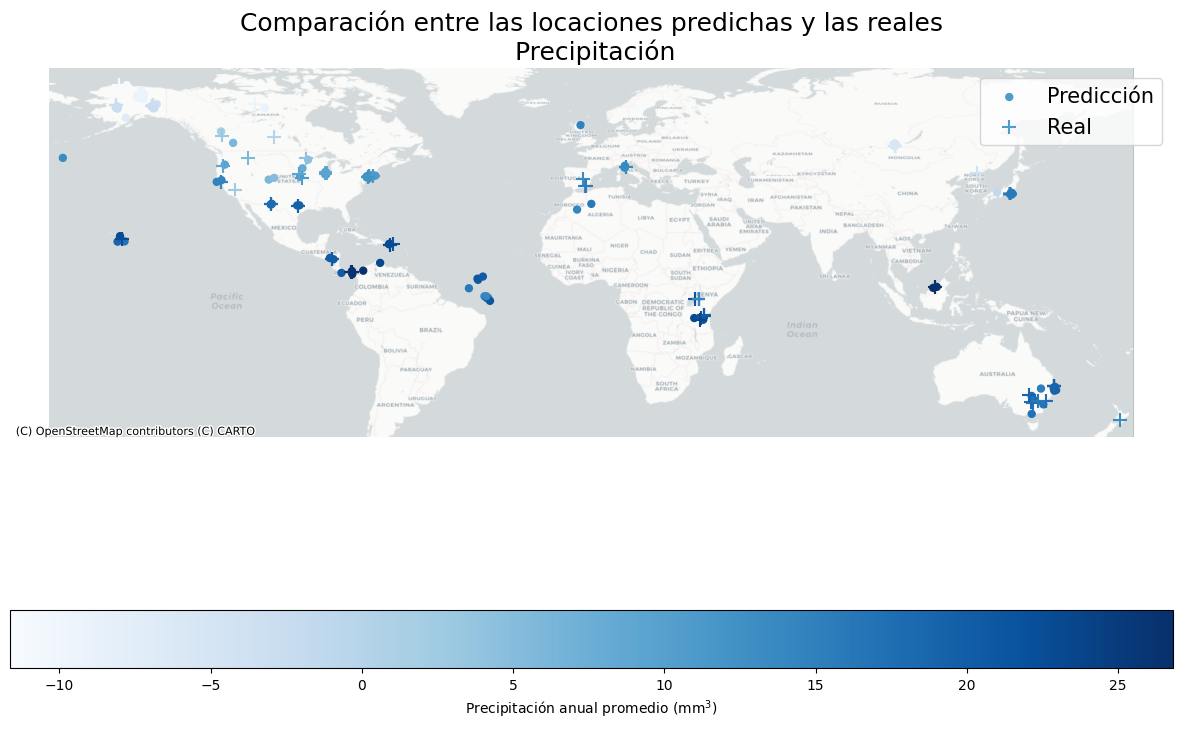

In [13]:
fig, ax = plt.subplots(1,1 ,figsize=(15, 15))

pred_gdf.plot(marker='.', ax=ax, markersize=100, zorder=1, column="BIO1_p",cmap="Blues", label="Predicción")
real_gdf.plot(marker='+', ax=ax, markersize=100, zorder=2, column="BIO1",cmap="Blues", label="Real", 
              legend=True, legend_kwds={'label': r"Precipitación anual promedio (mm$^3$)",
                        'orientation': "horizontal"})


plt.title("Comparación entre las locaciones predichas y las reales\n Precipitación",fontsize=18)


plt.axis("off")

plt.legend(fontsize=15)


ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')


#fig.savefig('coordsPrec.png', bbox_inches='tight', pad_inches=0)

### Comparison between the coordinates predicted and the real ones, adding information about the biomas

In [52]:
#We create a list with all the available biomas
reg = [
'Tropical & Subtropical Moist Broadleaf Forests',
'Tropical & Subtropical Dry Broadleaf Forests',
'Tropical & Subtropical Coniferous Forests',
'Temperate Broadleaf & Mixed Forests',
'Temperate Conifer Forests',
'Boreal Forests/Taiga',
'Tropical & Subtropical Grasslands,\nSavannas & Shrublands',
'Temperate Grasslands,\n Savannas & Shrublands',
'Flooded Grasslands & Savannas',
'Montane Grasslands & Shrublands',
'Tundra',
'Mediterranean Forests,\n Woodlands & Scrub',
'Deserts & Xeric Shrublands',
'Mangroves']

#We create a dictionary to pass from the codenames to the categorical names
names = {i+1:reg for i,reg in enumerate(reg)}

#We map the values to pass from codenames to the categorical names
real_gdf.BIOME = real_gdf.BIOME.map(names)

### Comparison between the coordinates predicted and the real ones, adding information about the BIOME

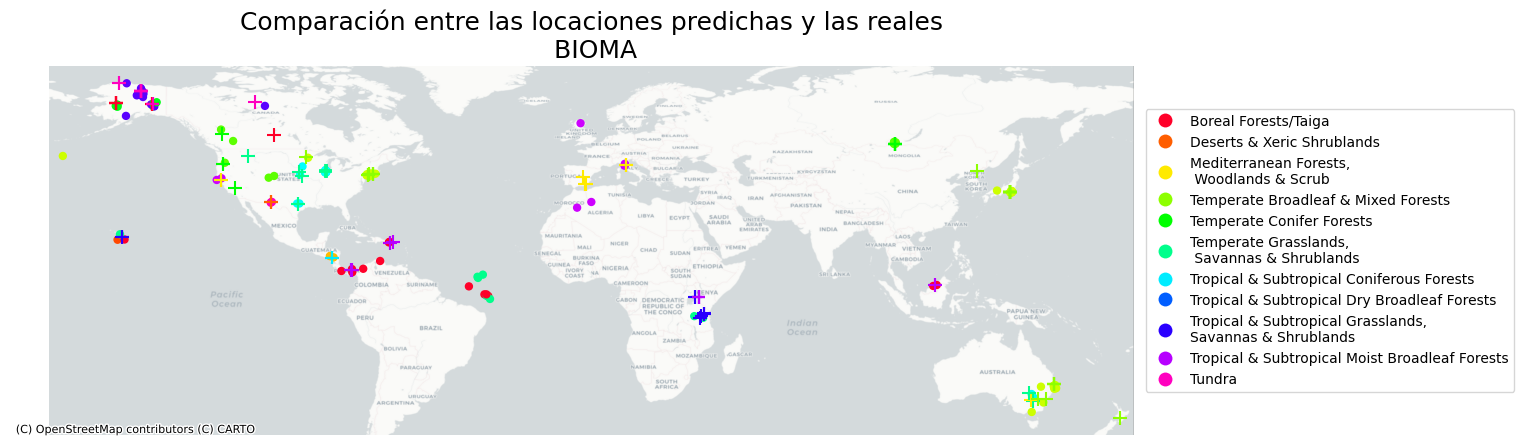

In [63]:
fig, ax = plt.subplots(1,1 ,figsize=(15, 15))

pred_gdf.plot(marker='.', ax=ax, markersize=100, zorder=1, column="BIOME_p",cmap="gist_rainbow", )
real_gdf.plot(marker='+', ax=ax, markersize=100, zorder=2, column="BIOME",cmap="gist_rainbow",
              categorical=True, legend=True, legend_kwds={'loc':5,'bbox_to_anchor':(1.3,0.5)})

plt.title("Comparación entre las locaciones predichas y las reales\n BIOMA",fontsize=18)


plt.axis("off")


ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')


fig.savefig('coordsBioma.png', bbox_inches='tight', pad_inches=0)

### Comparison between the coordinates predicted and the real ones, adding information about the eco-regions

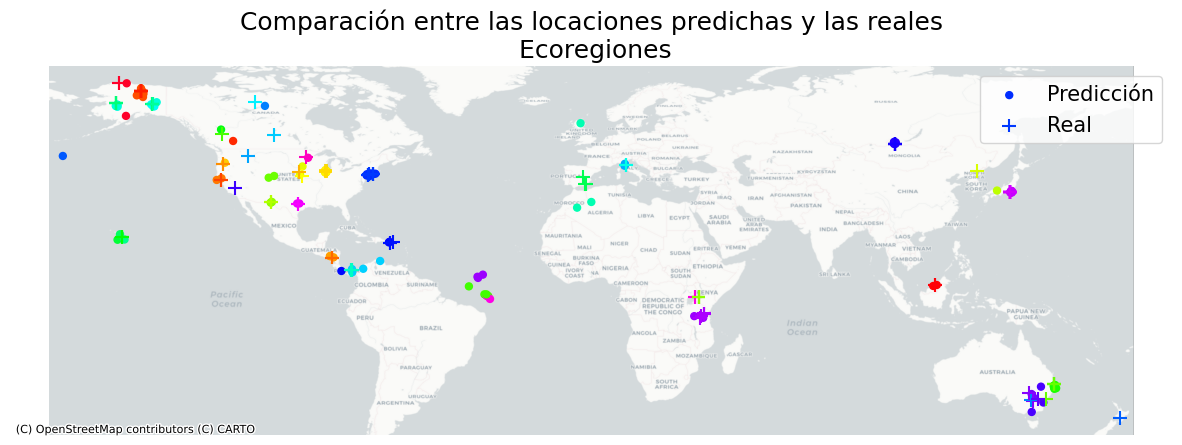

In [64]:
fig, ax = plt.subplots(1,1 ,figsize=(15, 15))

pred_gdf.plot(marker='.', ax=ax, markersize=100, zorder=1, column="ECONAME_p",cmap="gist_rainbow", label="Predicción")
real_gdf.plot(marker='+', ax=ax, markersize=100, zorder=2, column="ECONAME",cmap="gist_rainbow", label="Real",
              categorical=True,legend=True)


plt.title("Comparación entre las locaciones predichas y las reales\n Ecoregiones",fontsize=18)


plt.axis("off")


plt.legend(fontsize=15)


ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')


fig.savefig('coordsEcoregiones.png', bbox_inches='tight', pad_inches=0)

## Sampling the dataset
To visualise better the results, we will choose a sample based on the real eco-region, to help us choose better we will check the amount of points in each region

In [67]:
real_gdf.ECONAME.value_counts()

Central forest-grasslands transition                 38
Taiheiyo evergreen forests                           16
Brooks-British Range tundra                          12
Northeastern coastal forests                         11
Interior Alaska-Yukon lowland taiga                   9
Eastern Australian temperate forests                  7
Sayan montane conifer forests                         7
Southern Acacia-Commiphora bushlands and thickets     5
East African montane forests                          5
Isthmian-Atlantic moist forests                       4
Central American pine-oak forests                     3
Chihuahuan desert                                     3
Italian sclerophyllous and semi-deciduous forests     3
Puerto Rican moist forests                            3
Iberian sclerophyllous and semi-deciduous forests     3
Interior Yukon-Alaska alpine tundra                   3
Borneo lowland rain forests                           2
Central and Southern Cascades forests           

In this case, we will use the region _Northeastern coastal forests_
After that, we do the same we did for the complete dataset

Sampling the dataset

In [112]:
puntos_sample = puntos[puntos.ECONAME=="Northeastern coastal forests"]

In [113]:
puntos_sample

,Latitude,Longitude,x,y,z,Elevation,BIO1,BIO2,BIO3,BIO4,...,BIO12_p,BIO13_p,BIO14_p,BIO15_p,BIO16_p,BIO17_p,BIO18_p,BIO19_p,Longitude_p,Latitude_p
0,41.01534,-72.52808,-3988.143700,4585.354503,-1912.818577,15.0,10.775000,21.333334,0.300000,1167.0,...,9.418606,28.815302,861.58780,27.594439,-5.163330,32.746070,2.992606,18.642715,-72.583990,40.893646
7,40.82600,-73.94000,-4002.576215,4632.777340,-1762.497875,16.0,11.966666,23.000000,0.850000,1189.0,...,9.509075,28.230703,898.72156,29.522087,-4.436750,33.945614,22.252523,1.015427,-73.315100,41.133987
12,41.02531,-72.46175,-3987.485329,4582.986781,-1919.852576,8.0,10.770833,21.450001,0.150000,1179.0,...,9.472169,28.846690,865.10767,27.767353,-5.135817,32.887543,2.815407,18.722605,-71.696470,41.068330
18,40.63800,-74.07400,-3990.027215,4649.000954,-1748.174462,1.0,11.979167,22.983334,0.866667,1202.0,...,9.340336,28.352846,890.86127,29.568476,-4.029839,33.607883,22.318523,1.526443,-74.594600,40.497635
70,40.74800,-74.00100,-3997.488198,4639.640923,-1755.978706,10.0,12.254167,23.099998,1.366667,1210.0,...,9.316981,27.814877,889.13220,29.487507,-4.072871,33.581837,22.256077,1.442422,-74.497240,40.902863
85,40.74800,-74.00100,-3997.488198,4639.640923,-1755.978706,10.0,12.254167,23.099998,1.366667,1210.0,...,9.465217,28.235075,890.84230,29.370918,-4.321343,33.701670,22.402615,1.183336,-74.062090,40.538300
94,41.06283,-72.45028,-3990.233088,4580.084728,-1921.068657,11.0,10.695833,21.233334,0.266667,1186.0,...,9.566274,29.213669,860.59840,27.814743,-5.020361,32.849197,2.921932,18.559826,-73.225395,40.993300
104,40.82600,-73.94000,-4002.576215,4632.777340,-1762.497875,16.0,11.966666,23.000000,0.850000,1189.0,...,9.656127,28.113674,897.22010,29.580353,-4.467953,34.072330,22.341934,0.370418,-72.521070,40.962708
127,40.81100,-73.91400,-4000.840088,4633.219235,-1765.275931,13.0,11.991667,23.150000,0.750000,1176.0,...,9.578773,27.978485,903.38153,29.368032,-4.672556,34.065530,22.384584,0.668529,-73.572400,40.294280
140,41.02525,-72.46158,-3987.476791,4582.986659,-1919.870600,8.0,10.770833,21.450001,0.150000,1179.0,...,9.546387,28.837723,868.45180,27.746530,-5.358099,33.097260,2.721920,18.794643,-72.474330,41.074615


In [114]:
pred_sample = gpd.GeoDataFrame(puntos_sample.copy(), geometry=gpd.points_from_xy(puntos_sample['Longitude_p'], puntos_sample['Latitude_p']), crs='EPSG:4326')
real_sample = gpd.GeoDataFrame(puntos_sample.copy(), geometry=gpd.points_from_xy(puntos_sample['Longitude'], puntos_sample['Latitude']), crs='EPSG:4326')

### Comparison between the coordinates predicted and the real ones

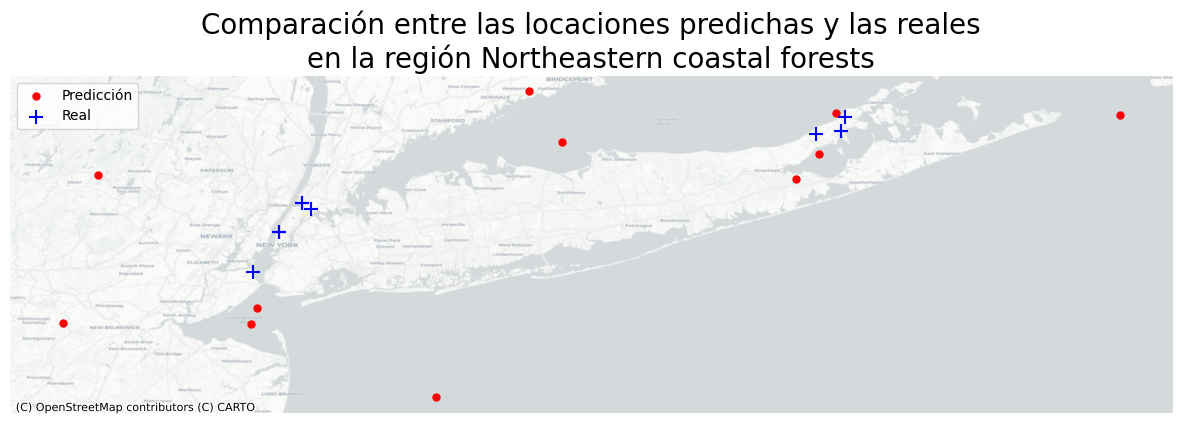

In [115]:
fig, ax = plt.subplots(1, figsize=(15, 15))
pred_sample.plot(marker='.', c='r', ax=ax, markersize=100, zorder=1, label="Predicción")
real_sample.plot(marker='+', c='b', ax=ax, markersize=100, zorder=2, label="Real")
plt.title("Comparación entre las locaciones predichas y las reales\nen la región Northeastern coastal forests",fontsize=20)
plt.axis("off")
plt.legend()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')
#fig.savefig('coordsSample.png', bbox_inches='tight', pad_inches=0)

### Comparison between the coordinates predicted and the real ones, adding information about the temperature (°C)

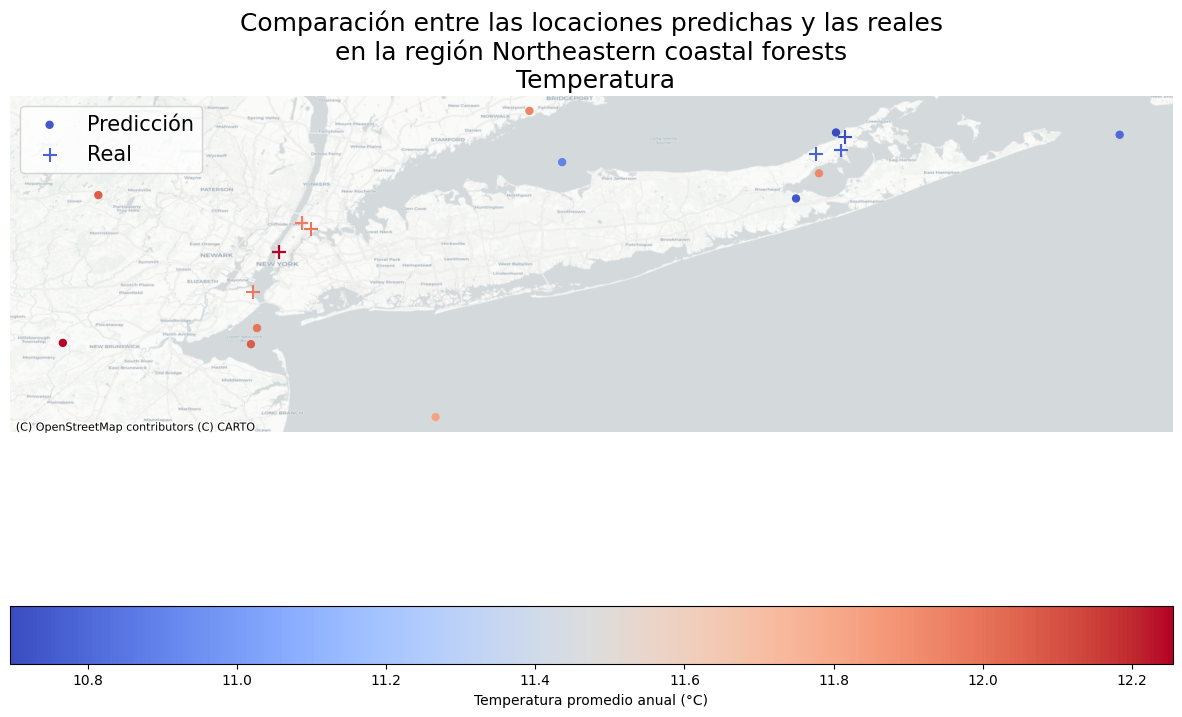

In [116]:
fig, ax = plt.subplots(1,1 ,figsize=(15, 15))
#Puntos
pred_sample.plot(marker='.', ax=ax, markersize=100, zorder=1, column="BIO1_p",cmap="coolwarm", label="Predicción")
real_sample.plot(marker='+', ax=ax, markersize=100, zorder=2, column="BIO1",cmap="coolwarm", label="Real", 
              legend=True, legend_kwds={'label': "Temperatura promedio anual (°C)",
                        'orientation': "horizontal"})

#Detalles
plt.title("Comparación entre las locaciones predichas y las reales\nen la región Northeastern coastal forests\n Temperatura",fontsize=18)


#Quitar axis
plt.axis("off")
plt.legend(fontsize=15)

#Agregar mapa base
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')
fig.savefig('coordsTemperturaSample.png', bbox_inches='tight', pad_inches=0)

### Comparison between the coordinates predicted and the real ones, adding information about the annual precipitation (mm³)

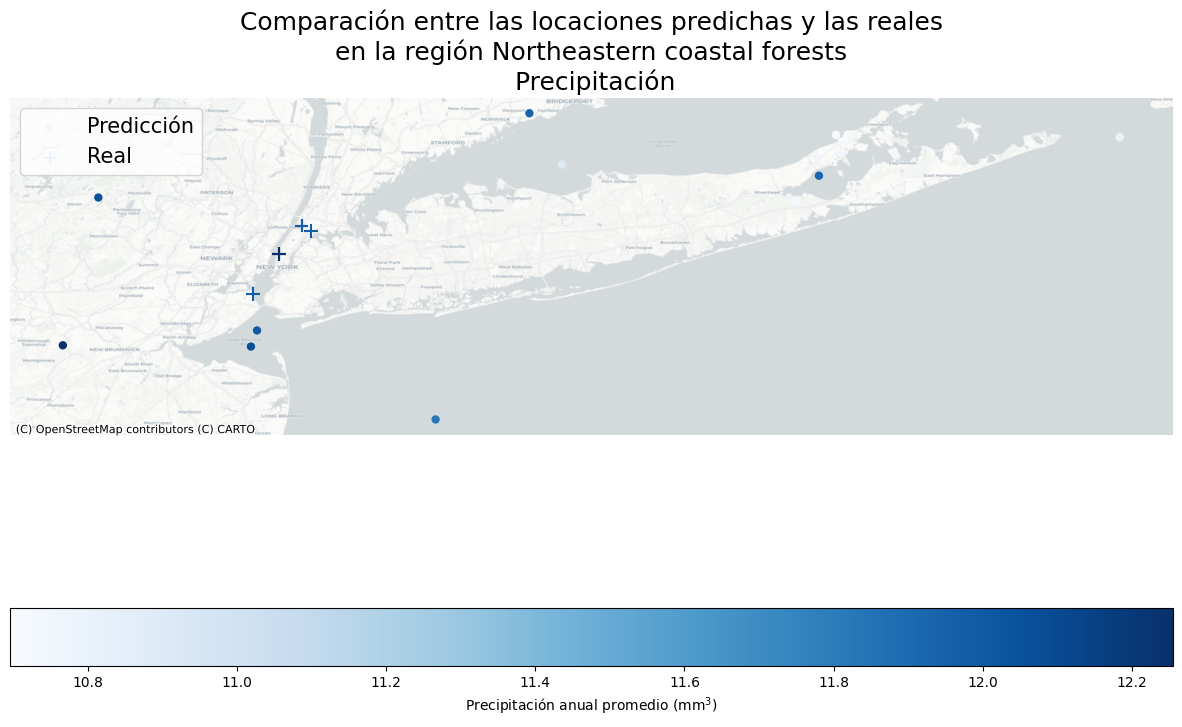

In [103]:
fig, ax = plt.subplots(1,1 ,figsize=(15, 15))
#Puntos
pred_sample.plot(marker='.', ax=ax, markersize=100, zorder=1, column="BIO1_p",cmap="Blues", label="Predicción")
real_sample.plot(marker='+', ax=ax, markersize=100, zorder=2, column="BIO1",cmap="Blues", label="Real", 
              legend=True, legend_kwds={'label': r"Precipitación anual promedio (mm$^3$)",
                        'orientation': "horizontal"})

#Detalles
plt.title("Comparación entre las locaciones predichas y las reales\nen la región Northeastern coastal forests\n Precipitación",fontsize=18)

#Quitar axis
plt.axis("off")
plt.legend(fontsize=15)

#Agregar mapa base
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')
fig.savefig('coordsPrecSample.png', bbox_inches='tight', pad_inches=0)

### Comparison between the coordinates predicted and the real ones, adding information about the biomas

In [119]:
reg = [
'Tropical & Subtropical Moist Broadleaf Forests',
'Tropical & Subtropical Dry Broadleaf Forests',
'Tropical & Subtropical Coniferous Forests',
'Temperate Broadleaf & Mixed Forests',
'Temperate Conifer Forests',
'Boreal Forests/Taiga',
'Tropical & Subtropical Grasslands,\nSavannas & Shrublands',
'Temperate Grasslands,\n Savannas & Shrublands',
'Flooded Grasslands & Savannas',
'Montane Grasslands & Shrublands',
'Tundra',
'Mediterranean Forests,\n Woodlands & Scrub',
'Deserts & Xeric Shrublands',
'Mangroves']
names = {i+1:reg for i,reg in enumerate(reg)}
real_sample.BIOME = names[4]

In [120]:
real_sample.BIOME

0      Temperate Broadleaf & Mixed Forests
7      Temperate Broadleaf & Mixed Forests
12     Temperate Broadleaf & Mixed Forests
18     Temperate Broadleaf & Mixed Forests
70     Temperate Broadleaf & Mixed Forests
85     Temperate Broadleaf & Mixed Forests
94     Temperate Broadleaf & Mixed Forests
104    Temperate Broadleaf & Mixed Forests
127    Temperate Broadleaf & Mixed Forests
140    Temperate Broadleaf & Mixed Forests
148    Temperate Broadleaf & Mixed Forests
Name: BIOME, dtype: object

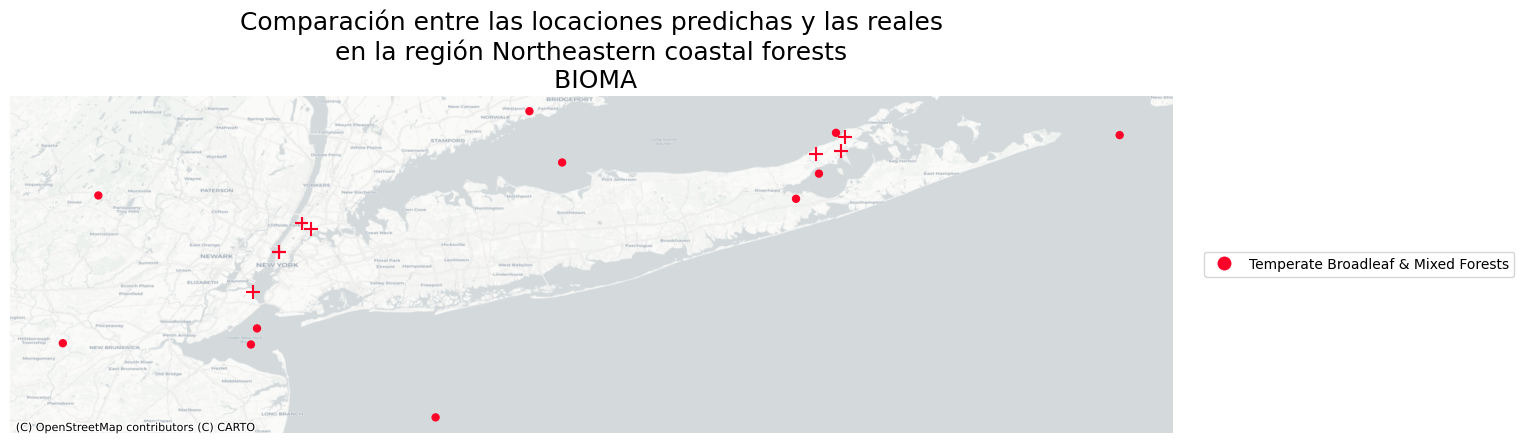

In [121]:
fig, ax = plt.subplots(1,1 ,figsize=(15, 15))
#Puntos
pred_sample.plot(marker='.', ax=ax, markersize=100, zorder=1, column="BIOME_p",cmap="gist_rainbow", )
real_sample.plot(marker='+', ax=ax, markersize=100, zorder=2, column="BIOME",cmap="gist_rainbow",
              categorical=True, legend=True, legend_kwds={'loc':5,'bbox_to_anchor':(1.3,0.5)})
#Detalles
plt.title("Comparación entre las locaciones predichas y las reales\nen la región Northeastern coastal forests\n BIOMA",fontsize=18)

#Quitar axis
plt.axis("off")

#Agregar mapa base
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs='EPSG:4326')
fig.savefig('coordsBiomaSample.png', bbox_inches='tight', pad_inches=0)